<a href="https://colab.research.google.com/github/deepthi-naresh/diseaseriskprediction/blob/main/datacleaningandeda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("diabetesforproject.csv")  # Replace with your file path
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
# Columns where 0 is invalid
invalid_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0 with NaN
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

# Check missing values
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [3]:
for col in invalid_zero_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Verify no missing values remain
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<ipython-input-3-7cff3803c427>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [4]:
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

# Apply to all numerical columns (except Outcome)
numerical_cols = df.columns.drop("Outcome")
df[numerical_cols] = df[numerical_cols].apply(cap_outliers)

In [5]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.837240  121.656250      72.358073      28.866536  124.691081   
std       3.344157   30.438286      11.697097       7.442353    7.913595   
min       0.000000   44.000000      40.000000      14.500000  112.875000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      13.500000  199.000000     104.000000      42.500000  135.875000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.393359                  0.458914   33.199870    0.348958  
std      6.667471                  0.285596   11.628404    0.476951  
min     18.200000                  

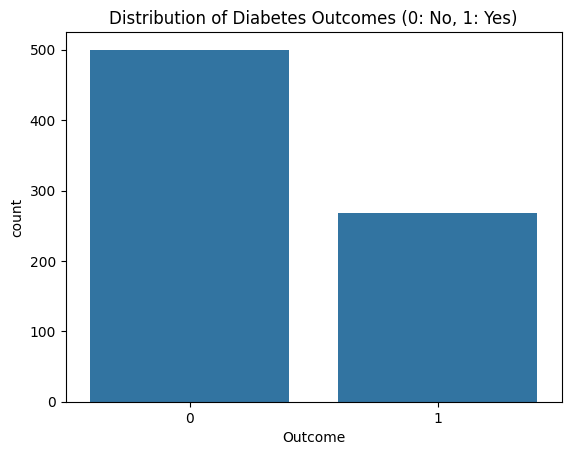

In [6]:
sns.countplot(x="Outcome", data=df)
plt.title("Distribution of Diabetes Outcomes (0: No, 1: Yes)")
plt.show()

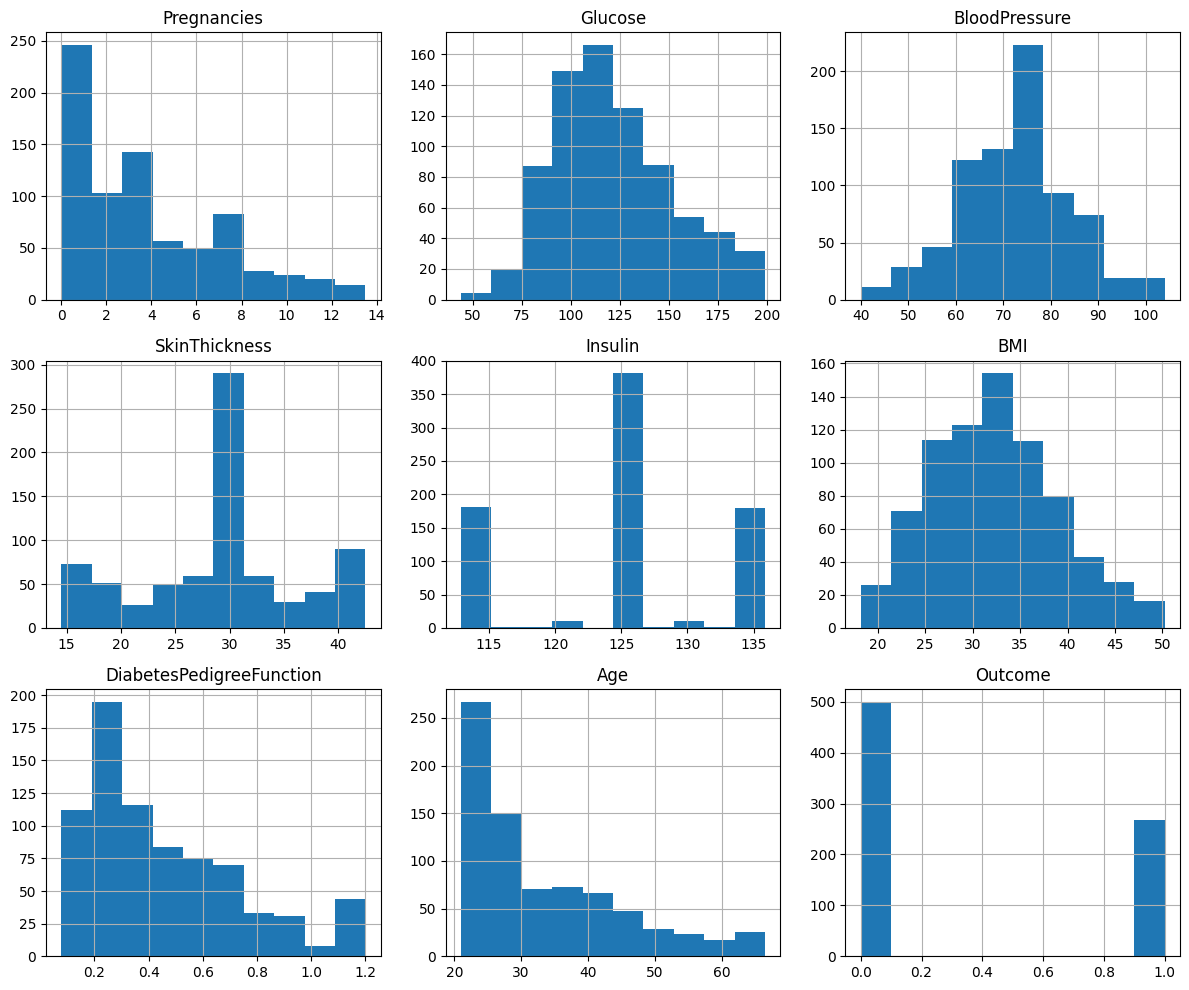

In [7]:
df.hist(figsize=(12, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

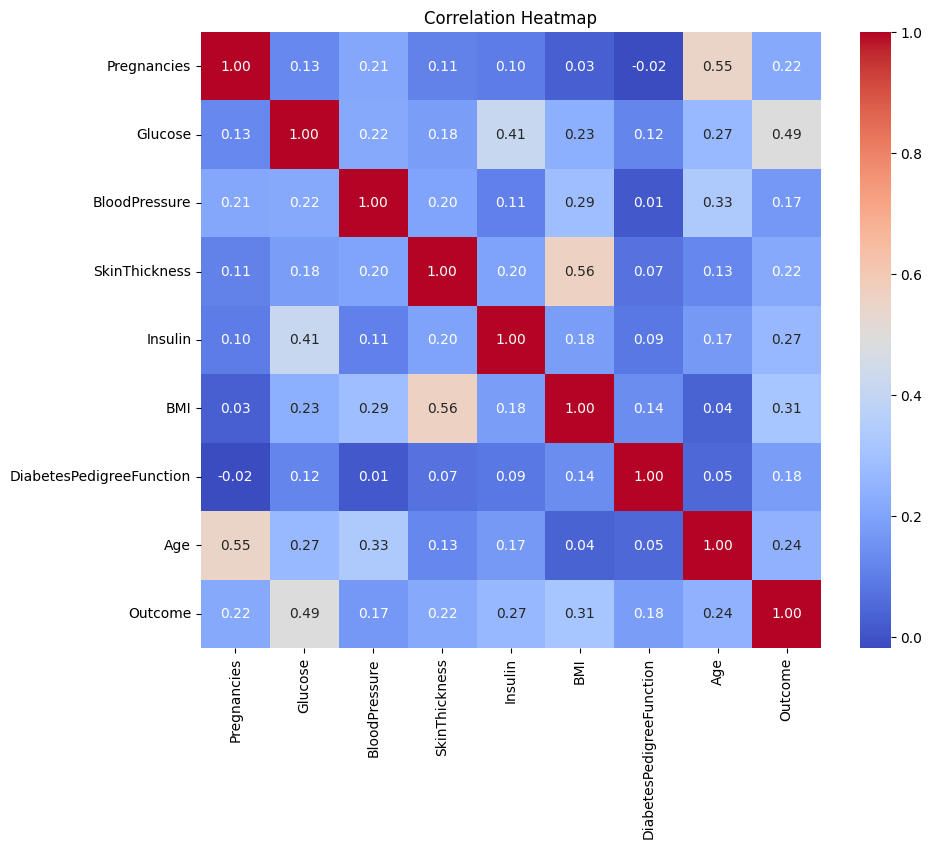

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

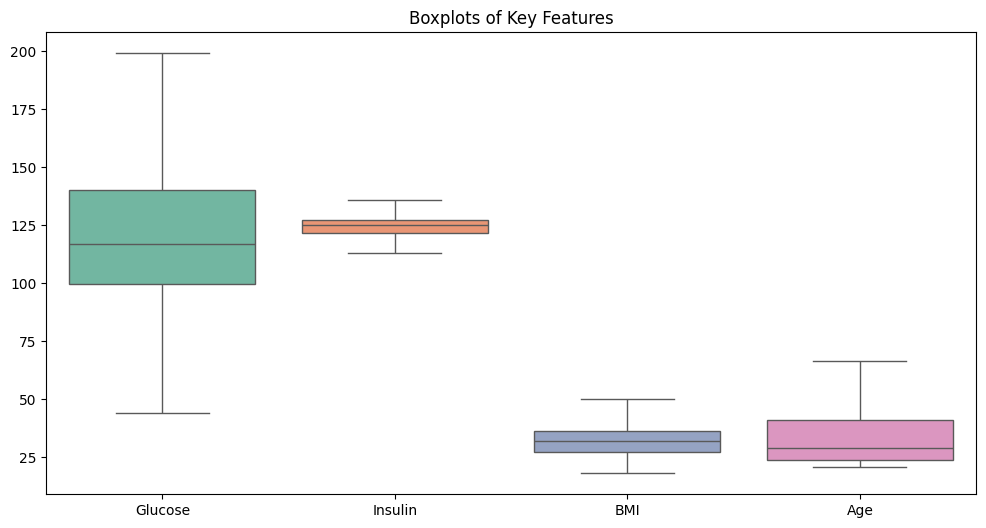

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Glucose", "Insulin", "BMI", "Age"]], palette="Set2")
plt.title("Boxplots of Key Features")
plt.show()

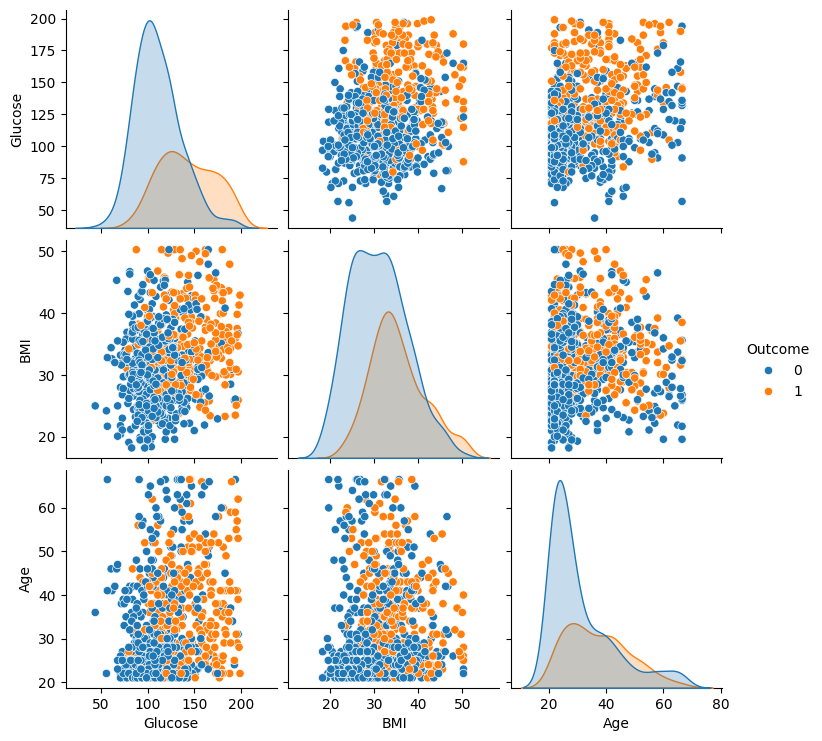

In [10]:
sns.pairplot(df, vars=["Glucose", "BMI", "Age"], hue="Outcome", diag_kind="kde")
plt.show()

<ipython-input-11-ae12542b5a72>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


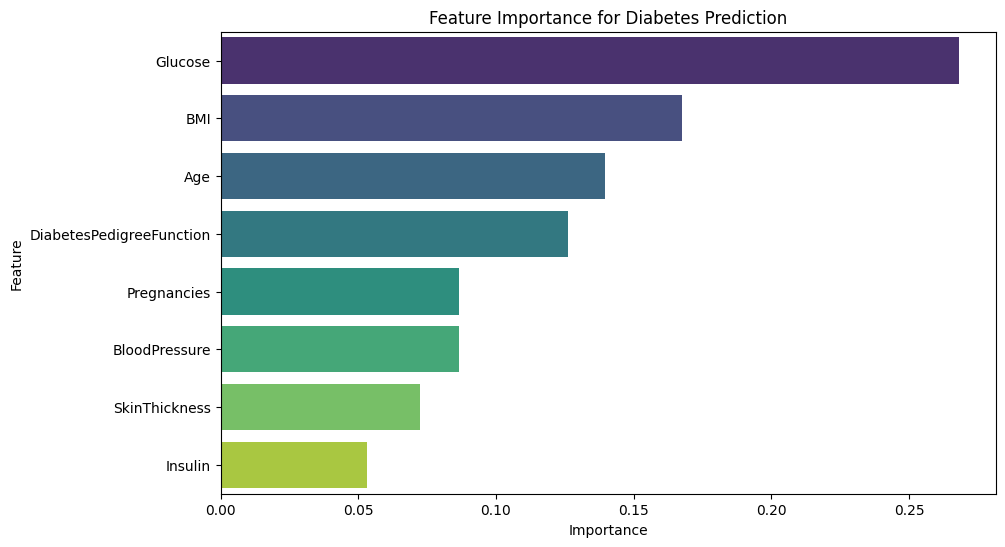

In [11]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Plot feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance for Diabetes Prediction")
plt.show()